In [1]:
import numpy as np
import pandas as pd
import pickle
import glob
import matplotlib.pyplot as plt

In [166]:
output_list = glob.glob('outputs/*')
output_list.sort()
output_list

['outputs/output__160__2.25__.pkl',
 'outputs/output__160__2.5__.pkl',
 'outputs/output__160__2__.pkl',
 'outputs/output__160__3.25__.pkl',
 'outputs/output__160__3.5__.pkl',
 'outputs/output__160__4__.pkl',
 'outputs/output__160__6__.pkl',
 'outputs/output__20__2.25__.pkl',
 'outputs/output__20__2.5__.pkl',
 'outputs/output__20__2__.pkl',
 'outputs/output__20__3.25__.pkl',
 'outputs/output__20__3.5__.pkl',
 'outputs/output__20__4__.pkl',
 'outputs/output__20__6__.pkl',
 'outputs/output__30__2.25__.pkl',
 'outputs/output__30__2.5__.pkl',
 'outputs/output__30__2__.pkl',
 'outputs/output__30__3.25__.pkl',
 'outputs/output__30__3.5__.pkl',
 'outputs/output__30__4__.pkl',
 'outputs/output__30__6__.pkl',
 'outputs/output__320__2.25__.pkl',
 'outputs/output__320__2.5__.pkl',
 'outputs/output__320__2__.pkl',
 'outputs/output__320__3.25__.pkl',
 'outputs/output__320__3.5__.pkl',
 'outputs/output__320__4__.pkl',
 'outputs/output__320__6__.pkl',
 'outputs/output__40__2.25__.pkl',
 'outputs/outpu

In [167]:
data = []

for file in output_list:

    aux = []

    granularity = file.split('__')[-2]

    output_dict = pickle.load(open(file, "rb"))

    if not (output_dict['n_time_series'] == 500 or np.isnan(output_dict['n_time_series']) == True):

        columns = list(output_dict.keys())

        for values in output_dict:

            value = float(output_dict[values])

            if np.isnan(value):

                aux.append(0)

            else:
                aux.append(value)

        aux.append(float(granularity))

        columns.append('granularity')

    data.append(aux)

df = pd.DataFrame(data, columns=columns).sort_values(by=['n_time_series'])

#df = df.drop(0, axis=0)
#df = df.drop(1, axis=0)


In [168]:
df

,n_time_series,mean_enlapsed_time,std_enlapsed_time,mean_n_good_groups,std_n_good_groups,mean_n_bad_groups,std_n_bad_groups,good_mean,good_std,bad_mean,bad_std,granularity
12,20.0,0.082336,0.004418,15.515152,0.701566,3.575758,0.494227,98.909505,7.143514,99.717514,3.055552,4.00
7,20.0,0.451810,2.184170,3.424242,1.477719,0.060606,0.238606,83.284165,15.551135,60.000000,0.000000,2.25
8,20.0,0.072033,0.007872,7.090909,2.247741,0.696970,0.797148,86.909510,18.928391,90.724638,15.695057,2.50
9,20.0,0.399526,1.908237,1.272727,0.445362,0.000000,0.000000,80.047763,6.271772,0.000000,0.000000,2.00
10,20.0,0.081257,0.003590,15.272727,0.896888,3.424242,0.604544,98.439153,8.497707,100.000000,0.000000,3.25
11,20.0,0.086359,0.010392,15.424242,0.853879,3.545455,0.497930,98.847413,7.275931,99.715100,3.068470,3.50
13,20.0,0.087947,0.013783,15.636364,0.642824,3.878788,0.326374,99.741602,3.431686,100.000000,0.000000,6.00
19,30.0,0.146868,0.007023,22.818182,1.140296,5.484848,0.609083,99.203187,5.754908,99.631676,3.484510,4.00
18,30.0,0.159920,0.011184,22.393939,1.324350,5.393939,0.599969,99.109157,5.995748,99.625468,3.513420,3.50
17,30.0,0.165652,0.023419,22.000000,1.435481,5.303030,0.626914,98.886593,6.818462,99.619048,3.543062,3.25


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

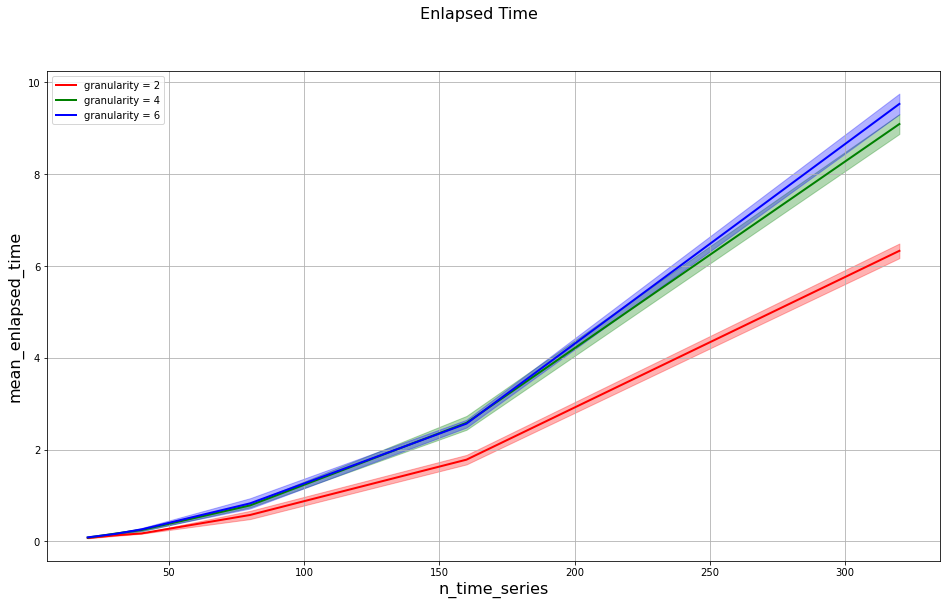

In [169]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Enlapsed Time', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2.5]

gra_4 = [df[::]['granularity'] == 3.25]

gra_6 = [df[::]['granularity'] == 3.5]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('mean_enlapsed_time', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['mean_enlapsed_time'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['mean_enlapsed_time'].values[gra_2] - df[::]['std_enlapsed_time'].values[gra_2],
                df[::]['mean_enlapsed_time'].values[gra_2] + df[::]['std_enlapsed_time'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['mean_enlapsed_time'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['mean_enlapsed_time'].values[gra_4] - df[::]['std_enlapsed_time'].values[gra_4],
                df[::]['mean_enlapsed_time'].values[gra_4] + df[::]['std_enlapsed_time'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['mean_enlapsed_time'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['mean_enlapsed_time'].values[gra_6] - df[::]['std_enlapsed_time'].values[gra_6],
                df[::]['mean_enlapsed_time'].values[gra_6] + df[::]['std_enlapsed_time'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('mean_enlapsed_time.png', bbox_inches='tight')


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

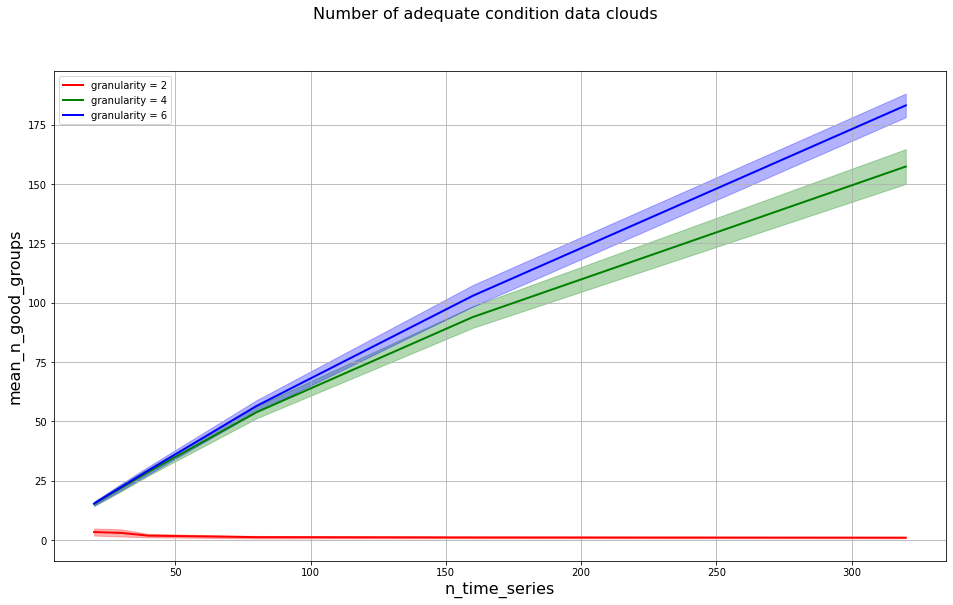

In [170]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Number of adequate condition data clouds', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2.25]

gra_4 = [df[::]['granularity'] == 3.25]

gra_6 = [df[::]['granularity'] == 3.5]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('mean_n_good_groups', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['mean_n_good_groups'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['mean_n_good_groups'].values[gra_2] - df[::]['std_n_good_groups'].values[gra_2],
                df[::]['mean_n_good_groups'].values[gra_2] + df[::]['std_n_good_groups'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['mean_n_good_groups'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['mean_n_good_groups'].values[gra_4] - df[::]['std_n_good_groups'].values[gra_4],
                df[::]['mean_n_good_groups'].values[gra_4] + df[::]['std_n_good_groups'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['mean_n_good_groups'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['mean_n_good_groups'].values[gra_6] - df[::]['std_n_good_groups'].values[gra_6],
                df[::]['mean_n_good_groups'].values[gra_6] + df[::]['std_n_good_groups'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('mean_n_good_groups.png', bbox_inches='tight')


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

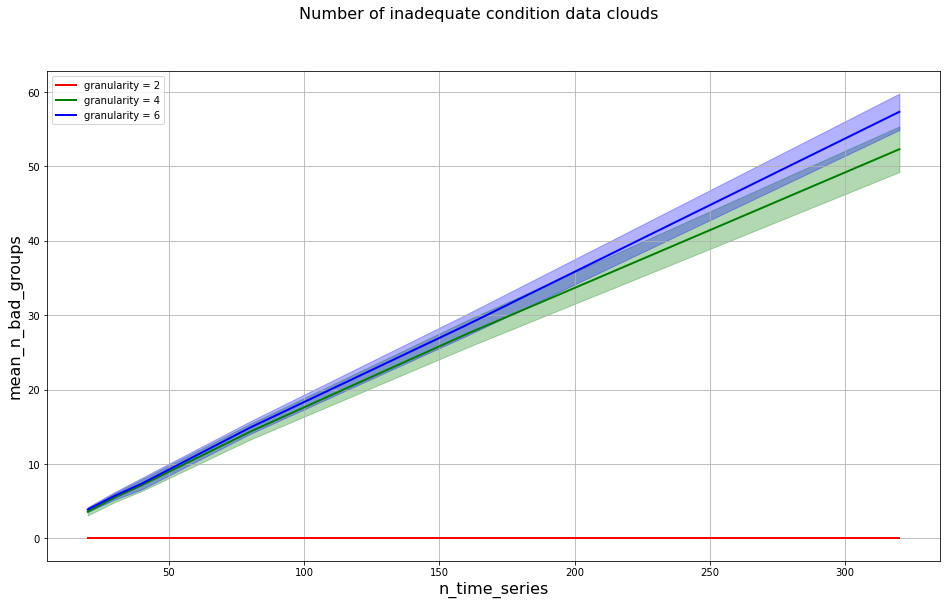

In [155]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Number of inadequate condition data clouds', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2]

gra_4 = [df[::]['granularity'] == 4]

gra_6 = [df[::]['granularity'] == 6]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('mean_n_bad_groups', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['mean_n_bad_groups'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['mean_n_bad_groups'].values[gra_2] - df[::]['std_n_bad_groups'].values[gra_2],
                df[::]['mean_n_bad_groups'].values[gra_2] + df[::]['std_n_bad_groups'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['mean_n_bad_groups'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['mean_n_bad_groups'].values[gra_4] - df[::]['std_n_bad_groups'].values[gra_4],
                df[::]['mean_n_bad_groups'].values[gra_4] + df[::]['std_n_bad_groups'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['mean_n_bad_groups'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['mean_n_bad_groups'].values[gra_6] - df[::]['std_n_bad_groups'].values[gra_6],
                df[::]['mean_n_bad_groups'].values[gra_6] + df[::]['std_n_bad_groups'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('mean_n_bad_groups.png', bbox_inches='tight')


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

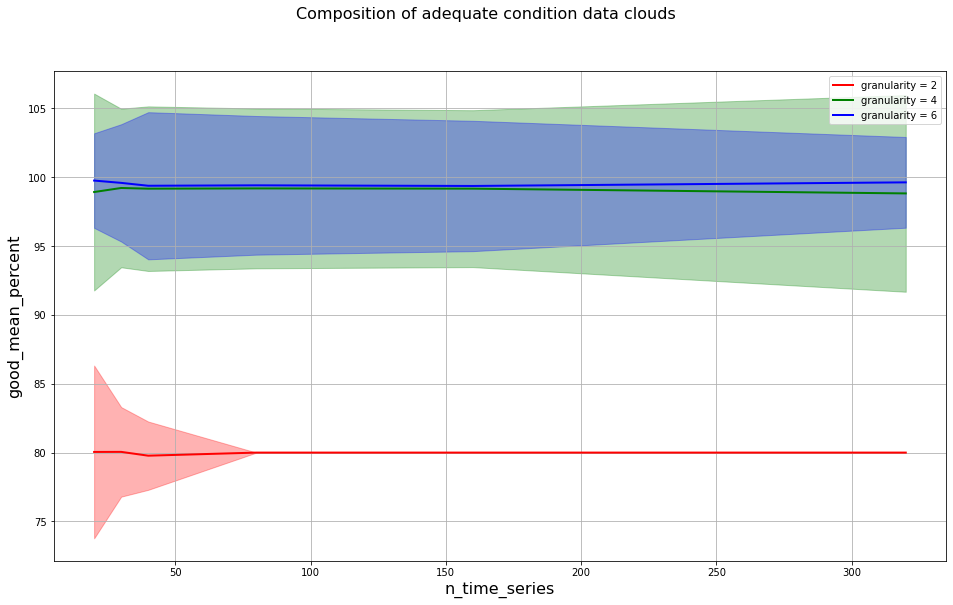

In [156]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Composition of adequate condition data clouds', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2]

gra_4 = [df[::]['granularity'] == 4]

gra_6 = [df[::]['granularity'] == 6]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('good_mean_percent', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['good_mean'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['good_mean'].values[gra_2] - df[::]['good_std'].values[gra_2],
                df[::]['good_mean'].values[gra_2] + df[::]['good_std'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['good_mean'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['good_mean'].values[gra_4] - df[::]['good_std'].values[gra_4],
                df[::]['good_mean'].values[gra_4] + df[::]['good_std'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['good_mean'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['good_mean'].values[gra_6] - df[::]['good_std'].values[gra_6],
                df[::]['good_mean'].values[gra_6] + df[::]['good_std'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('good_mean_percent.png', bbox_inches='tight')


/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/thiago/anaconda3/envs/CNPq-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array 

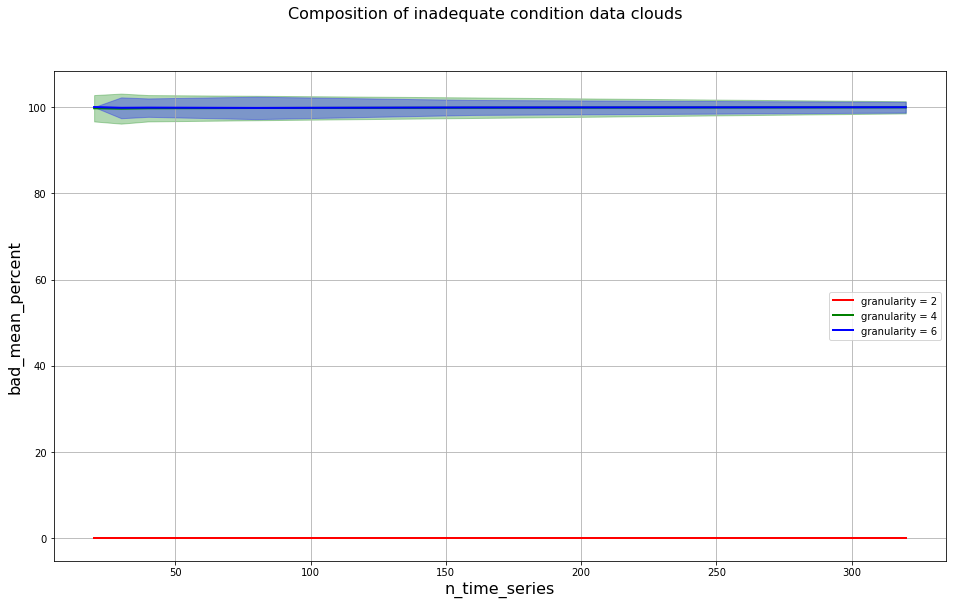

In [157]:
fig = plt.figure(figsize=[16, 9])
fig.suptitle('Composition of inadequate condition data clouds', fontsize=16)

# Plotando 2D

gra_2 = [df[::]['granularity'] == 2]

gra_4 = [df[::]['granularity'] == 4]

gra_6 = [df[::]['granularity'] == 6]


ax = fig.add_subplot(1, 1, 1)


ax.set_ylabel('bad_mean_percent', fontsize=16)
ax.set_xlabel('n_time_series', fontsize=16)

ax.plot(df[::]['n_time_series'].values[gra_2], df[::]['bad_mean'].values[gra_2], 'r', linewidth=2,
        label='granularity = {}'.format(2))

ax.fill_between(df[::]['n_time_series'].values[gra_2],
                df[::]['bad_mean'].values[gra_2] - df[::]['bad_std'].values[gra_2],
                df[::]['bad_mean'].values[gra_2] + df[::]['bad_std'].values[gra_2],
                color='r',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_4], df[::]['bad_mean'].values[gra_4], 'g', linewidth=2,
        label='granularity = {}'.format(4))

ax.fill_between(df[::]['n_time_series'].values[gra_4],
                df[::]['bad_mean'].values[gra_4] - df[::]['bad_std'].values[gra_4],
                df[::]['bad_mean'].values[gra_4] + df[::]['bad_std'].values[gra_4],
                color='g',
                alpha=0.3)

ax.plot(df[::]['n_time_series'].values[gra_6], df[::]['bad_mean'].values[gra_6], 'b', linewidth=2,
        label='granularity = {}'.format(6))

ax.fill_between(df[::]['n_time_series'].values[gra_6],
                df[::]['bad_mean'].values[gra_6] - df[::]['bad_std'].values[gra_6],
                df[::]['bad_mean'].values[gra_6] + df[::]['bad_std'].values[gra_6],
                color='b',
                alpha=0.3)

ax.grid()
ax.legend()

plt.show()
fig.savefig('bad_mean_percent.png', bbox_inches='tight')
